In [1]:
import Main
import importlib
import copy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import wcopt

importlib.reload(Main)
importlib.reload(wcopt)

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:80% !important; }</style>"))

# Initialization

In [2]:
# Parameters
T          = 300  # Truncation horizon
runcode    = 1

In [3]:
# Run the model to initialize
inputs, outputs, theta0    = Main.getruncodeFeatures(runcode)
ss, G, inputs, outputs_all = Main.SolveModel(theta0, T, [], False, runcode)

Recomputing steady state


In [4]:
# Output information about the initialization
G.keys()

dict_keys(['AB', 'ra', 'BZ', 'A', 'piw', 'C', 'w', 'B', 'Z2', 'BetaCB', 'BetaCZ', 'tax', 'C2', 'psip', 'Y', 'BC', 'div', 'N', 'A2', 'psiw', 'B2', 'i', 'I', 'Q', 'BetaCA', 'AC', 'rb', 'CZ', 'AZ', 'K', 'r', 'pi', 'U', 'p', 'mc', 'rstar', 'Z', 'G'])

# Testing

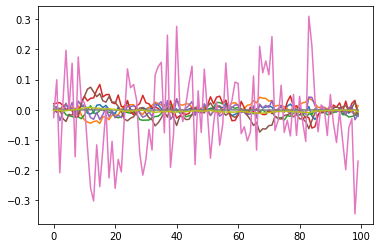

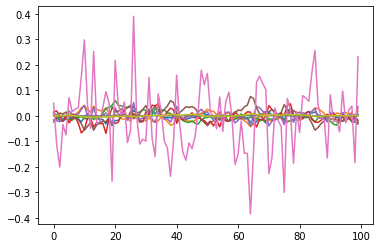

[ 8.25356128e-04  1.09591545e-03  2.77896891e-04  6.11743525e-04
 -2.57083034e-04 -2.71737747e-04  1.82374469e-02  8.48460756e-08
  1.95826197e-05]
[ 6.72006318e-04  9.60103786e-04  2.71961643e-04  4.27246326e-04
 -2.27782494e-04 -2.24788066e-04  1.68787903e-02  9.33349607e-08
  1.56396047e-05]
Testing analytical h
[ 5.67301761e-04  1.15430007e-03  4.90562981e-05  6.01057226e-04
 -2.51671001e-04 -2.85364557e-04  1.86443366e-02  1.61915635e-07
  2.79890022e-05]

Testing h, empirical, sim from MA
[ 7.63862263e-04  1.06743181e-03  2.90248114e-04  5.96717795e-04
 -2.63709115e-04 -2.84997127e-04  1.97478281e-02  7.80659715e-08
  1.99000771e-05]
Testing h, empirical, direct draw
[ 6.34592461e-04  9.26427487e-04  2.59628243e-04  3.98554462e-04
 -2.19335045e-04 -2.15754268e-04  1.64037143e-02  1.02100786e-07
  1.44228025e-05]
Testing analytical h
[ 5.67301761e-04  1.15430007e-03  4.90562981e-05  6.01057226e-04
 -2.51671001e-04 -2.85364557e-04  1.86443366e-02  1.61915635e-07
  2.79890022e-05]


In [5]:
## Testing
importlib.reload(Main)

Npd  = 100
Nsim = 10

# Compare simulation from MA rep vs. simulation via direct draw
inputs, outputs, theta0 = Main.getruncodeFeatures(runcode)
outputs_all = inputs + outputs
mZs         = Main.getShockMACoeffs(runcode, T)
dY          = Main.SimModel(ss, G, Npd, T, Nsim, outputs_all, mZs, True, None)
dY_         = Main.SimModel(ss, G, Npd, T, Nsim, outputs_all, mZs, False, None)
plt.plot(dY[:,:,1])
plt.show()
plt.plot(dY_[:,:,1])
plt.show()


# Compute moments given simulation 
muhats  = Main.compute_muhat(runcode, dY[:, len(inputs):, :])
print(np.mean(muhats, axis=1))
muhats_ = Main.compute_muhat(runcode, dY_[:, len(inputs):, :])
print(np.mean(muhats_, axis=1))


# Test analytical h
print('Testing analytical h')
print(Main.h_analytical(G, outputs, mZs, runcode))

# Test feeder h
print("")
print('Testing h, empirical, sim from MA')
print(Main.h([], ss, Npd, T, outputs, runcode, empirical=True, simFromMA=True, Nsim=Nsim))

print('Testing h, empirical, direct draw')
print(Main.h([], ss, Npd, T, outputs, runcode, empirical=True, simFromMA=False, Nsim=Nsim))

print('Testing analytical h')
print(Main.h([], ss, Npd, T, outputs, runcode, empirical=False))

# Running

## Simulation

In [7]:
# Simulate and Save
importlib.reload(Main)

runcode = 1

resim  = True
fromMA = True

T       = 300
Nsim    = 1000
Npd     = 100  # Number of periods to simulate
seed    = 314
strSave = Main.getStrSave(runcode, T, Npd, Nsim, fromMA)

if resim:
    # Get MA coefficients
    mZs = Main.getShockMACoeffs(runcode, T)
    
    # Simulate aggregates
    inputs, outputs, theta0 = Main.getruncodeFeatures(runcode)
    dY      = Main.SimModel(ss, G, Npd, T, Nsim, outputs, mZs, fromMA, seed)
    dY_dict = Main.SimsArrayToDict(dY, outputs)
    
    # Compute moments
    muhats = Main.compute_muhat(runcode, dY)
    
    # Save moments
    savepath = "./Results/muhats_" + strSave + ".npy"
    np.save(savepath, muhats)

[[ 6.97853854e-04  7.12840509e-04]
 [ 1.01404750e-03  1.01390436e-03]
 [ 2.69614463e-04  2.69741431e-04]
 [ 5.16057124e-04  5.25173286e-04]
 [-2.31199417e-04 -2.35063251e-04]
 [-2.51268154e-04 -2.52915245e-04]
 [ 1.78519525e-02  1.78091120e-02]
 [ 9.02669758e-08  9.04060979e-08]
 [ 1.79285113e-05  1.79662749e-05]]
[-2.10238541  0.0141174  -0.04707012 -1.73583886 -1.6437424  -0.65124227
  0.24055413 -0.15388565 -0.21019151]


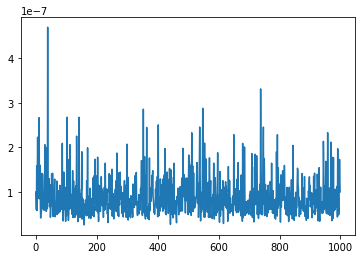

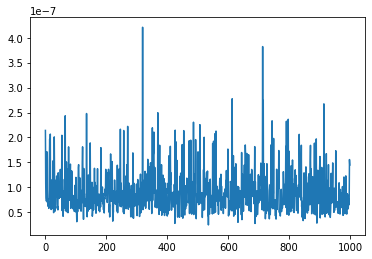

In [8]:
# Comparing simulations generated from MA vs. direct drawing
simCompare = True
T       = 300
Nsim    = 1000
Npd     = 100  # Number of periods to simulate
if simCompare:
    savepath_MA  = "Results/muhats_%s.npy" % Main.getStrSave(runcode, T, Npd, Nsim, True)
    savepath_sim = "Results/muhats_%s.npy" % Main.getStrSave(runcode, T, Npd, Nsim, False)

    muhats_MA  = np.load(savepath_MA)
    muhats_sim = np.load(savepath_sim)

    print(np.vstack([muhats_MA.mean(axis=1), muhats_sim.mean(axis=1)]).transpose())
    print(100*(muhats_MA.mean(axis=1)-muhats_sim.mean(axis=1)) / muhats_sim.mean(axis=1))
    
plt.plot(muhats_MA[7,:])
plt.show()
plt.plot(muhats_sim[7,:])
plt.show()

## Identification

In [10]:
# Ensuring that changing parameters changes the jacobians
resolveSS = True
if resolveSS:
    ss, G, inputs, outputs_all = Main.SolveModel([], T, [], False, runcode)

    inputs, outputs, theta0    = Main.getruncodeFeatures(runcode)
    theta0[0] = 2
    theta0[1] = 1
    theta0[2] = 1
    sspost, Gpost, inputs, outputs_all = Main.SolveModel(theta0, T, ss, False, runcode)
    
print(ss['Y'], ss['K'])
print(sspost['Y'], ss['K'])
print(np.hstack([G['Y']['Z'][:,0:2], Gpost['Y']['Z'][:,0:2]]))

Recomputing steady state
1 10
1 10
[[ 5.91446312e-01  6.55745609e-01  2.48328604e+00  1.21878585e+00]
 [ 1.43158773e-01  6.23836176e-01  4.61583563e-01  2.28510671e+00]
 [ 9.88890166e-02  1.54918435e-01  2.46981776e-01  3.44389702e-01]
 ...
 [ 4.93162609e-04  2.53411239e-04 -1.09403920e-03 -1.75620375e-03]
 [ 3.78231722e-04  1.97201359e-04 -9.25180597e-04 -1.48390974e-03]
 [ 2.70125321e-04  1.44562622e-04 -3.19762616e-04 -5.07993720e-04]]


Param 1 / 3...
[1.5, 0.1, 0.5]
[1.01, 0.1, 0.5]
[1.2325, 0.1, 0.5]
[1.455, 0.1, 0.5]
[1.6775, 0.1, 0.5]
[1.9, 0.1, 0.5]


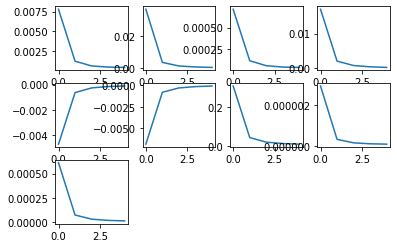

Param 2 / 3...
[1.5, 0.1, 0.5]
[1.5, 0.01, 0.5]
[1.5, 0.0575, 0.5]
[1.5, 0.105, 0.5]
[1.5, 0.15250000000000002, 0.5]
[1.5, 0.2, 0.5]


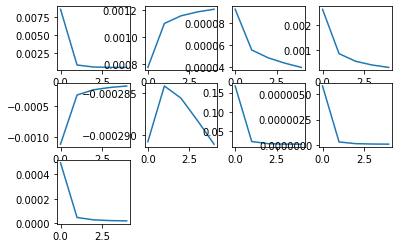

Param 3 / 3...
[1.5, 0.1, 0.5]
[1.5, 0.1, 0.2]
[1.5, 0.1, 0.325]
[1.5, 0.1, 0.44999999999999996]
[1.5, 0.1, 0.575]
[1.5, 0.1, 0.7]


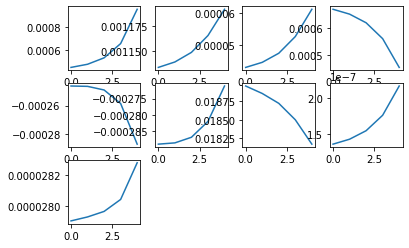

In [11]:
# Identification plots
importlib.reload(Main)

T       = 300
Npd     = 100  # Number of periods to simulate
checkID = True
if checkID:
    # Get parameters to loop over
    thetas, theta0 = Main.paramsCheckID(runcode)
    Nparams = len(thetas)
    
    # Evaluate at initial parameters
    Nmoments = len(Main.h(theta0, ss, Npd, T, outputs, runcode, empirical=False))
    
    # Loop over parameters
    for p in range(Nparams):
        print("Param %d / %d..." % (p+1, Nparams))
        
        # Set everything to defaults to start
        theta = copy.deepcopy(theta0)
        print(theta0)
        
        # Create array to hold values of moments across different parameter vals
        h_ = np.zeros((Nmoments, len(thetas[p])))
                 
        # Loop over values in identification range        
        for i in range(len(thetas[p])):
            # Set that parameter
            theta[p] = thetas[p][i]
            print(theta)
            
            # Compute h
            h_[:,i] = Main.h(theta, ss, Npd, T, outputs, runcode, empirical=False)

        # Plot identification plots by moment
        for m in range(Nmoments):
            plt.subplot(np.round(np.ceil(Nmoments/4)), 4, m+1)
            plt.plot(h_[m,:])
        plt.show()

## Moment Matching